1. Check to person Disease or not

In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.array([[98.0], [98.5], [99.0], [100.0], [101.0]])
y = np.array([0, 0, 0, 1, 1])

model = LogisticRegression()
model.fit(X, y)

temp = 102
prediction = model.predict([[temp]])
prob = model.predict_proba([[temp]])

print("Temperature:", temp)
print("Disease (1-yes/0-no):", prediction[0])
print("Probabilities:", prob[0])


Temperature: 102
Disease (1-yes/0-no): 1
Probabilities: [0.08128323 0.91871677]


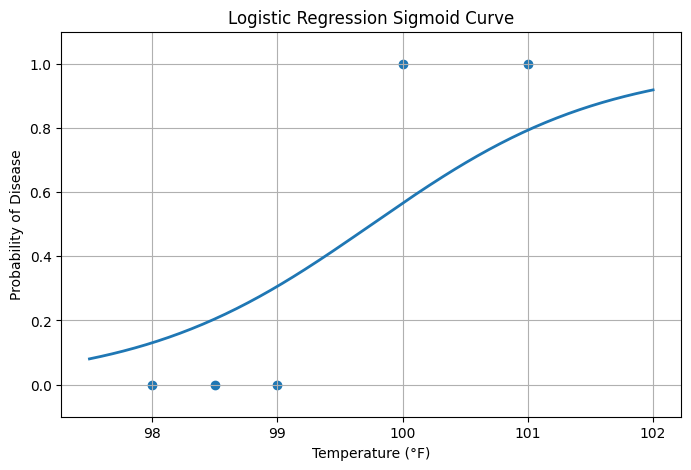

Temperature: 99.5
Disease (1/0): 0
Probabilities: [0.56877801 0.43122199]


In [3]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Original Data
X = np.array([[98.0], [98.5], [99.0], [100.0], [101.0]])
y = np.array([0, 0, 0, 1, 1])

# Train Model
model = LogisticRegression()
model.fit(X, y)

# New Data Range for Smooth Curve
temp_range = np.linspace(97.5, 102, 200).reshape(-1, 1)

# Predicted Probabilities
probabilities = model.predict_proba(temp_range)[:, 1]

# Plot Sigmoid Curve
plt.figure(figsize=(8, 5))
plt.plot(temp_range, probabilities, linewidth=2)

# Plot Original Points (optional)
plt.scatter(X, y, marker='o')

plt.xlabel("Temperature (°F)")
plt.ylabel("Probability of Disease")
plt.title("Logistic Regression Sigmoid Curve")
plt.grid(True)
plt.ylim(-0.1, 1.1)

plt.show()

# Single prediction (same as your code)
temp = 99.5
prediction = model.predict([[temp]])
prob = model.predict_proba([[temp]])

print("Temperature:", temp)
print("Disease (1/0):", prediction[0])
print("Probabilities:", prob[0])


IMport seaborn and used iris dataset

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

#iris dataset from seaborn
df = sns.load_dataset('iris')
print(df.head())

# show specific columns
print('')
print(df['species'].unique())


#--check null values
print('')
print('-------------check null values in each column:--------------')
print(df.isnull().sum())

In [33]:
#---remove setosa species
df_no_setosa = df[df['species'] != 'setosa']
print('removed setosa species:')
print(df_no_setosa.head())

removed setosa species:
    sepal_length  sepal_width  petal_length  petal_width  species
50           7.0          3.2           4.7          1.4        0
51           6.4          3.2           4.5          1.5        0
52           6.9          3.1           4.9          1.5        0
53           5.5          2.3           4.0          1.3        0
54           6.5          2.8           4.6          1.5        0


In [32]:
#--assign to versicolor :0 or virginica:1
import seaborn as sns
import pandas as pd
import numpy as np

#iris dataset from seaborn
df = sns.load_dataset('iris')
print(df.head())

#remove the setosa value
df = df[df['species'] != 'setosa']

# print(df['species'].unique())

#set value to versicolor:0 or virginica:1
df['species'] = df['species'].map({'versicolor': 0, 'virginica': 1})
print(df.head())
# print(df['species'].unique())

# print(df) #print all data


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
    sepal_length  sepal_width  petal_length  petal_width  species
50           7.0          3.2           4.7          1.4        0
51           6.4          3.2           4.5          1.5        0
52           6.9          3.1           4.9          1.5        0
53           5.5          2.3           4.0          1.3        0
54           6.5          2.8           4.6          1.5        0


In [36]:
#-- Split dataset into independent and dependent features
x = df.iloc[:,:-1]  #independent features
y = df.iloc[:,-1]  #dependent features
print(x.head())
print('')
print('-----------------Dependent feature:-----------------')
print(y.head())

    sepal_length  sepal_width  petal_length  petal_width
50           7.0          3.2           4.7          1.4
51           6.4          3.2           4.5          1.5
52           6.9          3.1           4.9          1.5
53           5.5          2.3           4.0          1.3
54           6.5          2.8           4.6          1.5

-----------------Dependent feature:-----------------
50    0
51    0
52    0
53    0
54    0
Name: species, dtype: int64


In [ ]:
#--skelern.model_selection train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Define model
classifier = LogisticRegression(solver='saga', max_iter=1000)

# Define parameter grid
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
    'max_iter': [100, 200, 300]
}

# Grid Search
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)




In [44]:
print("Best parameters found:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l1'}
Best accuracy: 1.0


In [45]:
#--prediction
y_pred = grid_search.predict(x_test)


In [47]:
##--find accuracy
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(y_pred, y_test)
print(score)

print('')

print(classification_report(y_test, y_pred))

0.88

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.79      1.00      0.88        11

    accuracy                           0.88        25
   macro avg       0.89      0.89      0.88        25
weighted avg       0.91      0.88      0.88        25



c:\Users\shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


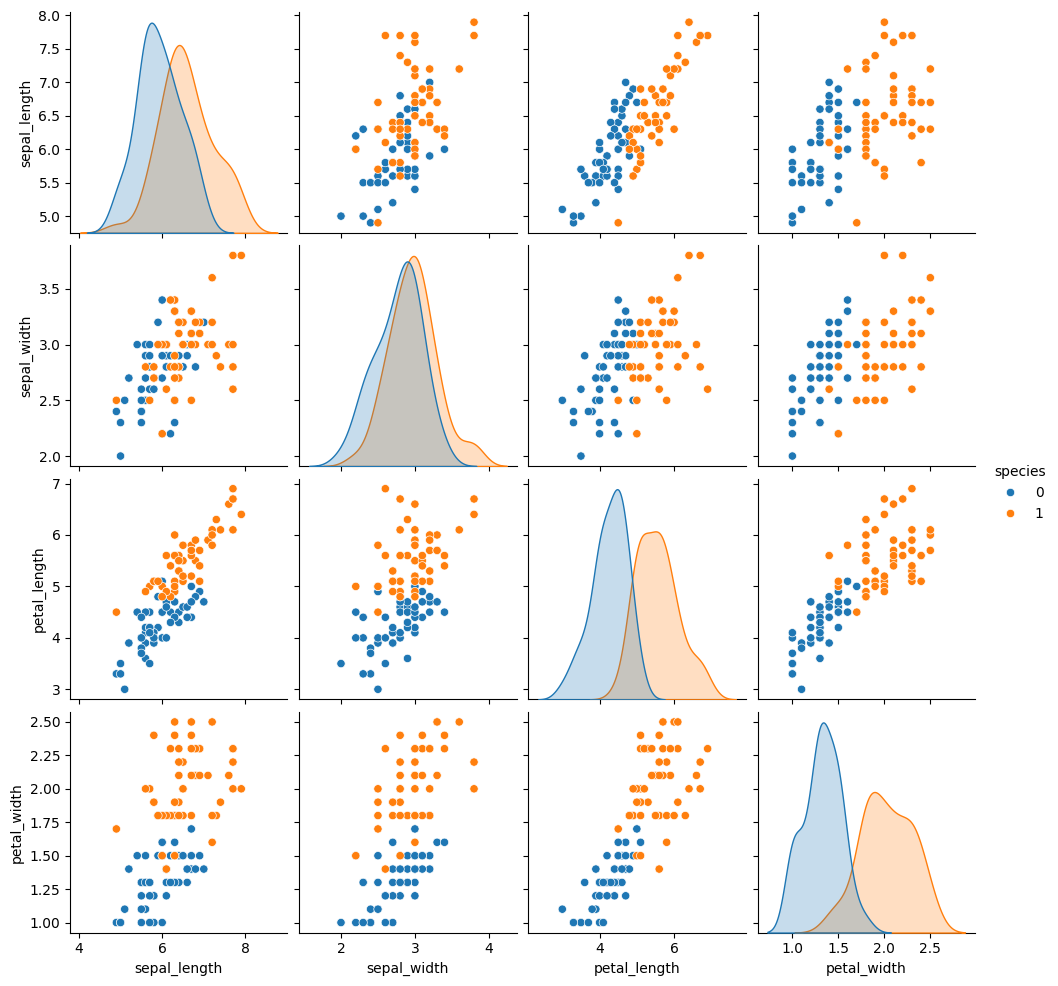

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


In [49]:
#--EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue='species')
plt.show()

df.corr()